In [1]:
import pandas as pd
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv(f"../../data/geometric_mean_analysis.csv")

for i in range(3):
    data[f"input{i}"] = data[f"input{i}"].apply(lambda x: mpz(x))
    
data["gm_mul"] = data.input0 * data.input1 * data.input2
    
data["gm_ideal"] = data["gm_ideal"].apply(lambda x: mpz(x))
data["gm_old"] = data["gm_old"].apply(lambda x: mpz(x))
data["gm_opt"] = data["gm_opt"].apply(lambda x: mpz(x))
data["gm_old_diff"] = data.gm_old - data.gm_ideal
data["gm_opt_diff"] = data.gm_opt - data.gm_ideal

data

,input0,input1,input2,gm_ideal,gm_old,gm_opt,gm_oldgas,gm_optgas,gm_mul,gm_old_diff,gm_opt_diff
0,3894925713840833021619152,3894925713840833021611838,3894925713840833021620477,3894925713840832879001600,3894925713840833019023859,3894925713840833019023859,2420,939,5908776144794885622270160845587398549893791789...,140022259,140022259
1,2206211635069673755125200,2206211635069673755125352,2206211635069673755125235,2206211635069673654976512,2206211635069673753654544,2206211635069673753654544,2420,927,1073844783799151479221959375535957896747729487...,98678032,98678032
2,1893216551261203490745771,1893216551261203490747327,1893216551261203490747837,1893216551261203389743104,1893216551261203489485692,1893216551261203489485692,2537,963,6785797224524954546139820753529249725496473930...,99742588,99742588
3,2013095776153936433855327,2013095776153936433848488,2013095776153936433842248,2013095776153936326557696,2013095776153936432513263,2013095776153936432513263,2031,867,8158180555882819669144461649934192880570504683...,105955567,105955567
4,2415696126356785196834796,2415696126356785196837345,2415696126356785196832622,2415696126356785199054848,2415696126356785195226880,2415696126356785195226880,2148,891,1409700678282929073783686863448250206316403931...,-3827968,-3827968
...,...,...,...,...,...,...,...,...,...,...,...
9995,9551851235321641742905385,9551851235321641742911294,9551851235321641742905198,9551851235321641393192960,9551851235321641736543393,9551851235321641736543393,2148,891,8714904850602294014020668428272588617434972688...,343350433,343350433
9996,2723800664558037257285575,2723800664558037257292927,2723800664558037257296107,2723800664558037127659520,2723800664558037255480239,2723800664558037255480239,2537,963,2020812243651617722177961378676084351192977289...,127820719,127820719
9997,9117091504761363661048638,9117091504761363661054511,9117091504761363661054740,9117091504761363224330240,9117091504761363654976678,9117091504761363654976678,2537,963,7578250223839337084528436175290236628642084145...,430646438,430646438
9998,677409310379552085485884,677409310379552085486415,677409310379552085486326,677409310379552094027776,677409310379552085034808,677409310379552085034808,2420,927,3108518697829812016313018546413509837459173723...,-8992968,-8992968


In [3]:
(data.gm_old_diff == data.gm_opt_diff).all()

True

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'AVG gas used old: 2311.2459, AVG gas used optimized: 915.31')

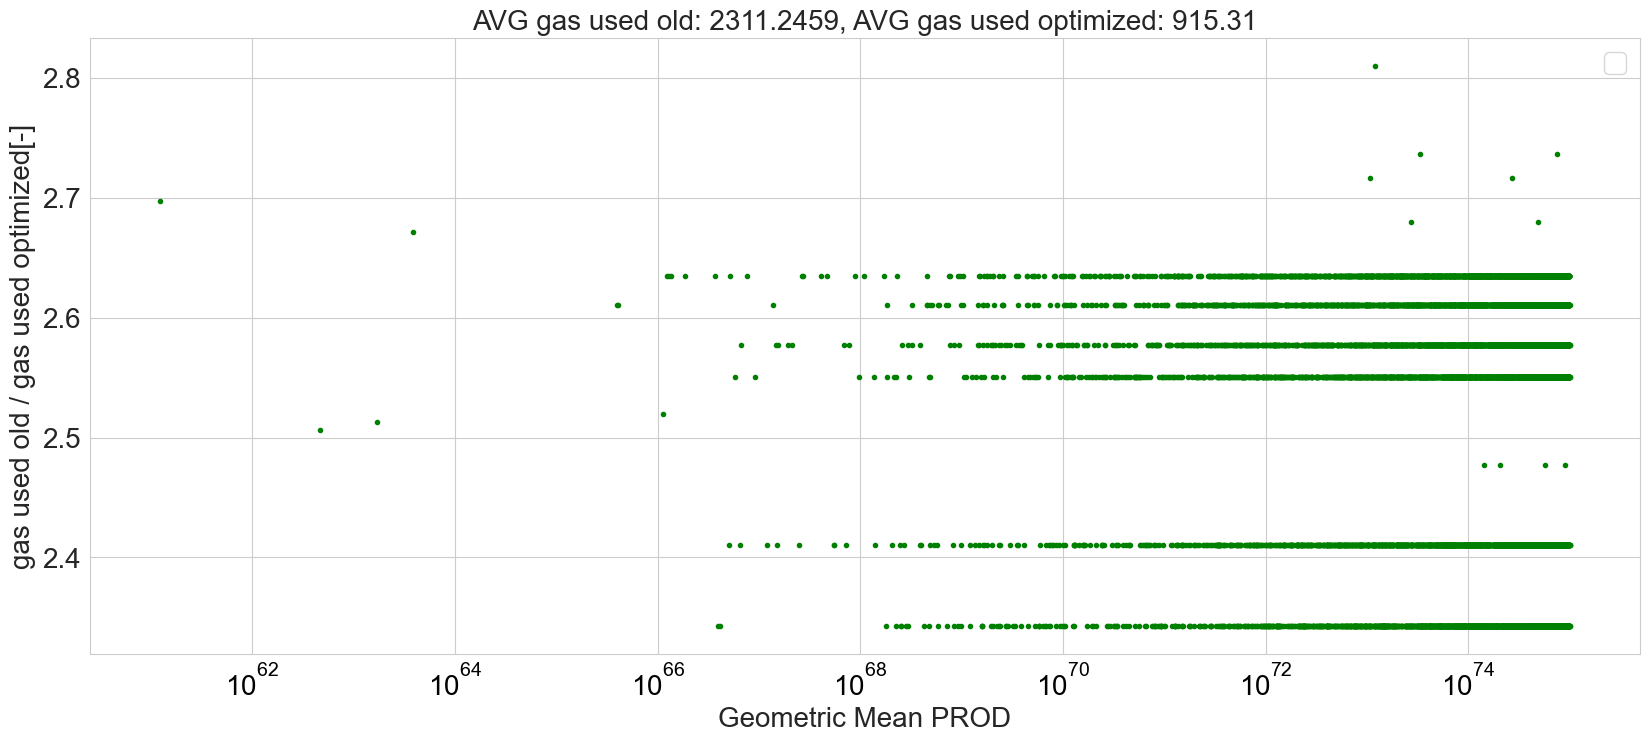

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_oldgas / data.gm_optgas,
    '.',
    color="green",
)

ax.set_xlabel("Geometric Mean PROD", fontsize=20)
ax.set_ylabel("gas used old / gas used optimized[-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20);
ax.set_title(f"AVG gas used old: {data.gm_oldgas.mean()}, AVG gas used optimized: {data.gm_optgas.mean():.2f}", fontsize=20)

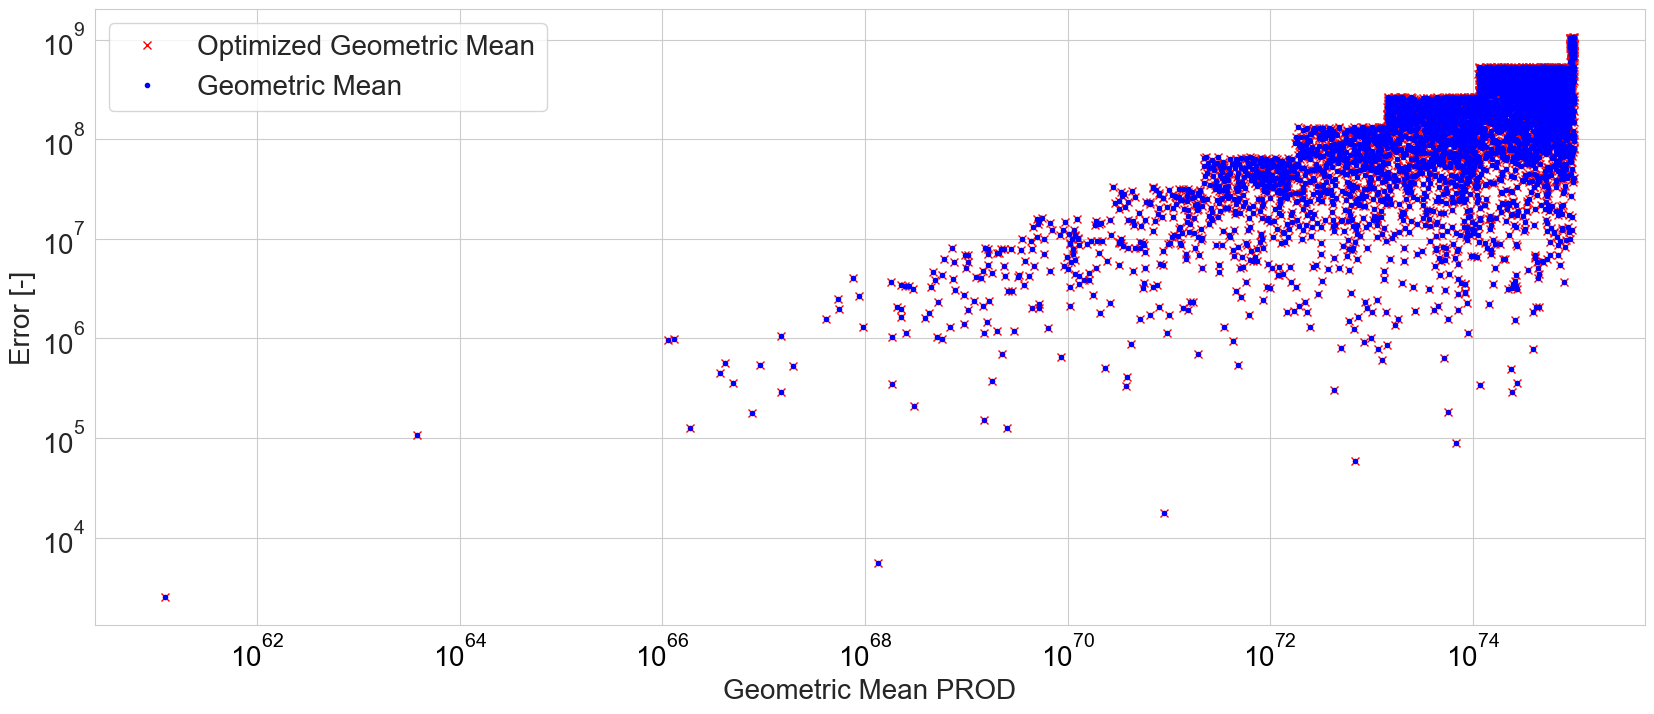

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    'x',
    color="red",
    label="Optimized Geometric Mean"
)
ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    '.',
    color="blue",
    label="Geometric Mean"
)

ax.set_xlabel("Geometric Mean PROD", fontsize=20)
ax.set_ylabel("Error [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=20);

In [6]:
float(data.gm_mul[data.gm_opt_diff.astype(float).idxmin()])

9.842605137858986e+74